# Analise de Componentes Principais

In [1]:
# Carregando a base de dados

data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### Atenção

No cálculo do PCA é importante centralizar os dados ao redor do zero e normalizá-los, pois os dados podem enviezar o cálculo do determinante nos autovalores.

In [3]:
# Simples, rápida e eficiente implementação de uma PCA

pca <- prcomp(iris[, 1:4]
             , center = T
             , scale = T)

In [4]:
# O que existe dentro de uma PCA?

names(pca)

str(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [5]:
# Desvio padrão de cada componente
pca$sdev

# Correlação com cada PC - quanto maior, mais a variância é explicada por aquela PC
pca$rotation

[1] 1.7083611 0.9560494 0.3830886 0.1439265

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [6]:
# Médias das variáveis usadas na normalização

pca$center

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

In [8]:
# Desvios padrão das variáveis, usados na normalização

pca$scale

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8280661    0.4358663    1.7652982    0.7622377

In [9]:
# Valor de cada PC para cada registro da base

pca$x[1:5,]

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.02408751
-2.074013,0.6718827,0.23382552,0.10266284
-2.356335,0.3407664,-0.04405390,0.02828231
-2.291707,0.5953999,-0.09098530,-0.06573534
-2.381863,-0.6446757,-0.01568565,-0.03580287


In [10]:
# Resultado por componente

summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

In [11]:
# Descriçao por variável

print(pca)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


In [14]:
# Como encontrar a variância 

desvio <- pca$sdev

# A variâcnia é o desvio padrão ao quadrado

variancia <- desvio^2

variancia

[1] 2.91849782 0.91403047 0.14675688 0.02071484

In [16]:
# E quanto desta variância é explciada por cada componente?

var_explicada <- variancia/sum(variancia)

round(var_explicada, 4)

[1] 0.7296 0.2285 0.0367 0.0052

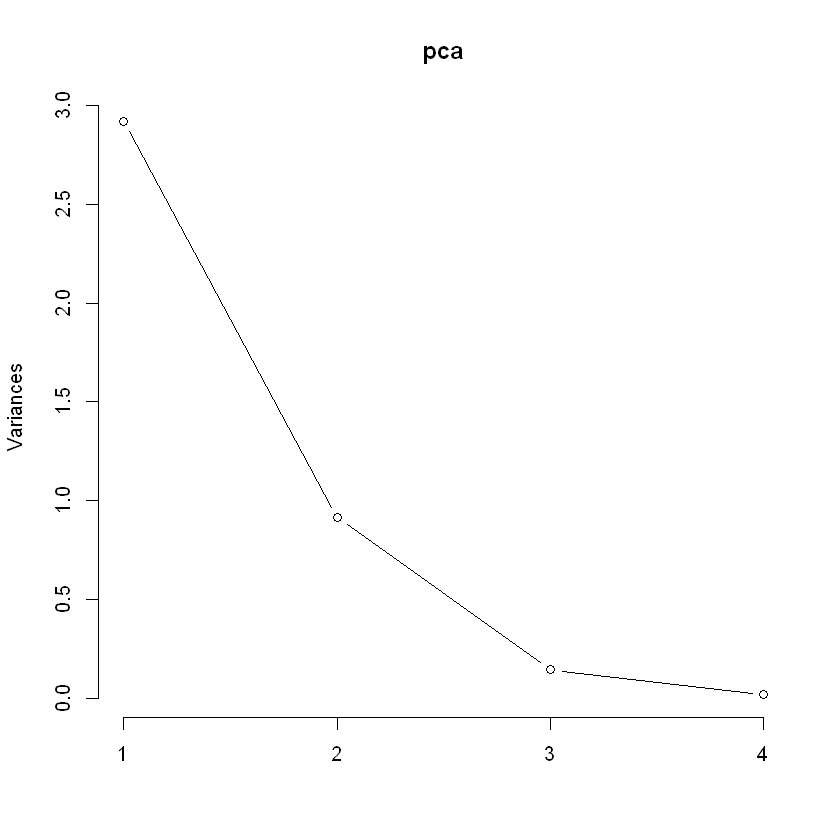

In [17]:
# Visualizando PCs por variância

plot(pca, type ="l")

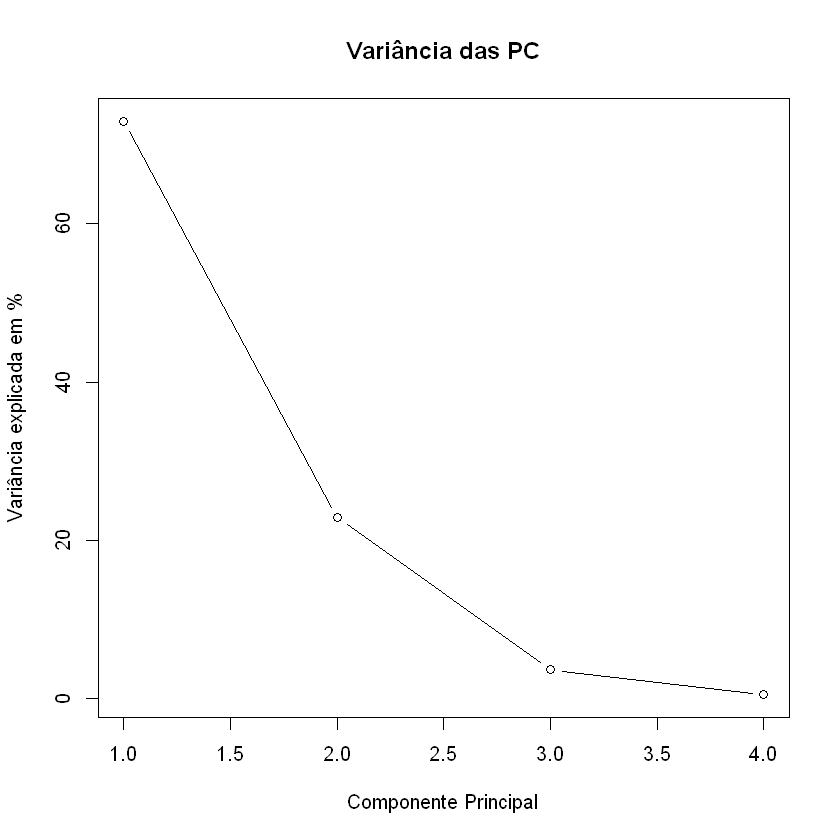

In [19]:
plot(var_explicada*100
    , xlab = "Componente Principal"
    , ylab = "Variância explicada em %"
    , type = "b"
    , main = "Variância das PC")

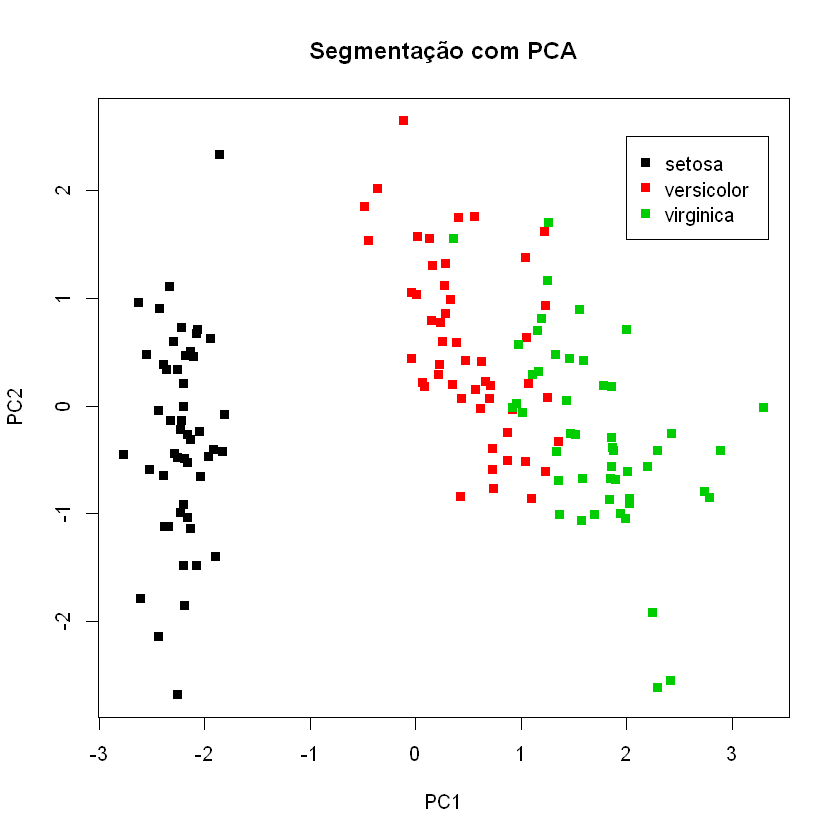

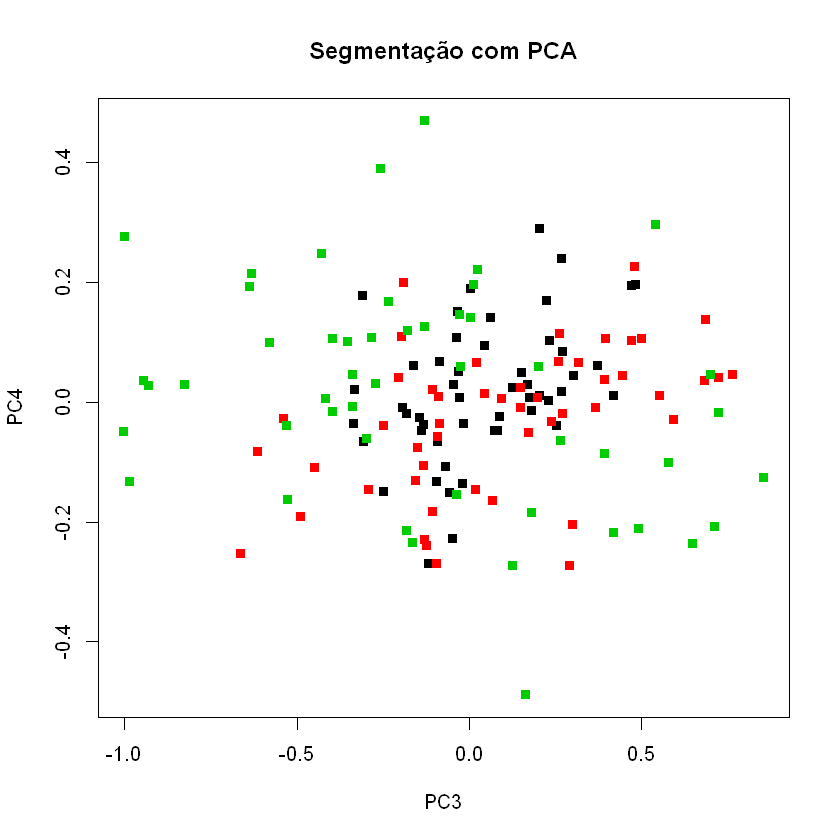

In [21]:
# Visualizando as componentes no gráfico

plot(pca$x[,1], pca$x[,2]
    , col = iris[,5]
    , pch = 15
    , xlab = "PC1"
    , ylab = "PC2"
    , main = "Segmentação com PCA")

legend(2, 2.5
      , unique(iris$Species)
      , col = 1:length(iris$Species)
      , pch = 15)

plot(pca$x[,3], pca$x[,4]
    , col = iris[,5]
    , pch = 15
    , xlab = "PC3"
    , ylab = "PC4"
    , main = "Segmentação com PCA")

legend(2, 2.5
      , unique(iris$Species)
      , col = 1:length(iris$Species)
      , pch = 15)